<a href="https://colab.research.google.com/github/pthkbs123/SkillTreePython-DeepLearning/blob/main/01.%EB%94%A5%EB%9F%AC%EB%8B%9Dwith%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0-basic/ch01_07_CNN%EA%B8%B0%EC%B4%88_Pooling_Layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch01.07 CNN기초 - Pooling Layer
---

* 날짜: 2022-07-05
* 이름: 박태현

## 학습내용
    - CNN의 개념을 이해한다.
    - 텐서플로우를 이용해 CNN을 구성한다.
    - CNN 모델을 이용해 손글씨 이미지를 분류한다.
    - CNN의 feature map에 대해 이해한다.

## 데이터셋

* MNIST

```
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
```

In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Pooling layer
---

풀링(Pooling) 연산은 커널과 스트라이드 개념이 존재한다는 점에서 합성곱 연산과 유사하지만, 학습해야 할 가중치가 없으며 연산 후에 채널 수가 변하지 않습니다. 일반적으로 합성곱 층(합성곱 연산 + 활성화 함수) 다음에는 풀링 층을 추가하는 것이 일반적입니다. 


In [5]:
from tensorflow.keras.layers import MaxPool2D, AvgPool2D

### **| 맥스 풀링(Max Pooling)**
맥스풀링은 이미지 영역의 최대값 만을 출력값으로 가지는 연산 방법입니다. 



<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0107-01.PNG?raw=true width=400>
</p>



In [6]:
x = np.array([1,0,1,1,1,2,0,0,1,0,1,0,0,0,1,1], dtype='float16').reshape(1,4,4,1)
print(x, x.shape)

y = MaxPool2D(pool_size = 2, strides = 1)(x) # kernel_size = pool_size / input_shape -> (n,w,h,ch). 안그러면 오류
print(y[0,:,:,0] ,y.shape)

[[[[1.]
   [0.]
   [1.]
   [1.]]

  [[1.]
   [2.]
   [0.]
   [0.]]

  [[1.]
   [0.]
   [1.]
   [0.]]

  [[0.]
   [0.]
   [1.]
   [1.]]]] (1, 4, 4, 1)
tf.Tensor(
[[2. 2. 1.]
 [2. 2. 1.]
 [1. 1. 1.]], shape=(3, 3), dtype=float32) (1, 3, 3, 1)


### **| 평균 풀링(Average Pooling)**


평균풀링은 이미지 영역의 평균값 을 출력값으로 가지는 연산 방법입니다. 


<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0107-02.PNG?raw=true width=400>
</p>





In [7]:
x = np.array([1,0,1,1,1,2,0,0,1,0,1,0,0,0,1,1], dtype='float16').reshape(1,4,4,1)
print(x, x.shape)

y = AvgPool2D(pool_size = 2, strides = 1)(x) # kernel_size = pool_size / input_shape -> (n,w,h,ch). 안그러면 오류
print(y[0,:,:,0] ,y.shape)

[[[[1.]
   [0.]
   [1.]
   [1.]]

  [[1.]
   [2.]
   [0.]
   [0.]]

  [[1.]
   [0.]
   [1.]
   [0.]]

  [[0.]
   [0.]
   [1.]
   [1.]]]] (1, 4, 4, 1)
tf.Tensor(
[[1.   0.75 0.5 ]
 [1.   0.75 0.25]
 [0.25 0.5  0.75]], shape=(3, 3), dtype=float32) (1, 3, 3, 1)


## LeNet-5
---

LeNet-5[(논문)](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf) 구조는 아마도 가장 널리 알려진 CNN 구조일 것입니다. 이 구조는 1998년 얀 르쿤이 만들었으며 손글씨 숫자 인식(MNIST)에 널리 사용되었습니다. 


![](https://www.datasciencecentral.com/wp-content/uploads/2021/10/1lvvWF48t7cyRWqct13eU0w.jpeg)

### | LeNet-5을 이용한 손글씨 이미지 분류

####  **데이터 준비**

In [24]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# 전처리-정규화
x_train, x_test = x_train/255.0 , x_test/255.0
# 전처리-shape 맞추기
x_train = np.expand_dims(x_train, 3)
x_test = np.expand_dims(x_test, 3)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1) (60000,) (10000,)


#### **모델 구성**

In [25]:
from tensorflow.keras import layers, models, utils
def build_lenet5():
  x = layers.Input(shape = (28,28,1))
  y = layers.Conv2D(filters=6, kernel_size = 5, padding = 'same', activation = 'tanh')(x)
  y = layers.AvgPool2D(pool_size = 2, strides = 2)(y)
  y = layers.Conv2D(filters=16, kernel_size = 5, padding = 'valid', activation = 'tanh')(y)
  y = layers.MaxPool2D(pool_size = 2, strides = 2)(y)

  y = layers.Flatten()(y)
  y = layers.Dense(120, activation='tanh')(y)
  y = layers.Dense(84, activation='tanh')(y)
  y = layers.Dense(10, activation='softmax')(y)
  model = tf.keras.models.Model(x,y)
  return model

#### **학습 및 평가**

In [26]:
model = build_lenet5()
model.summary()
model.compile(optimizer = 'sgd', # 경사하강법 (배치)
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']
              )
model.fit(x_train, y_train, epochs=10)
print('===테스트 스코어===')
model.evaluate(x_test, y_test)

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_5 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_9 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 400)               0   

[0.04496404156088829, 0.9855999946594238]

### **| Feature map**

#### **feature map 얻기**

In [33]:
#for layer in model.layers:
#  print(layer, layer.output)
layer_outputs = [layer.output for layer in model.layers] # 레이어의 아웃풋 = 데이터 변환과정
model_output_by_layer = models.Model(inputs=model.input, outputs=layer_outputs) # 모든 레이어의 아웃풋 획득 가능
print(len(layer_outputs))
x_pred_maps = model_output_by_layer(x_test)
for x_pred_map in x_pred_maps:
  print(x_pred_map.shape)
cnn_layers = [1,2,3,4]
dnn_layers = [5,6,7]

9
(10000, 28, 28, 1)
(10000, 28, 28, 6)
(10000, 14, 14, 6)
(10000, 10, 10, 16)
(10000, 5, 5, 16)
(10000, 400)
(10000, 120)
(10000, 84)
(10000, 10)


#### **시각화**

![](https://www.datasciencecentral.com/wp-content/uploads/2021/10/1lvvWF48t7cyRWqct13eU0w.jpeg)

[시각화 함수 스크립트](https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/01.%EB%94%A5%EB%9F%AC%EB%8B%9Dwith%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0-basic/scripts/featuremap_dict.py)

In [28]:
import numpy as numpy
import tensorflow as tf
import matplotlib.pyplot as plt

def show_featuremap(sample_idx, fmaps, cnn_idxs, flatten_idxs):
  for idx in cnn_idxs:
    fmap = fmaps[idx][sample_idx]
    chs = fmap.shape[2]
    print(f'{idx} 번째 Convolutional 레이어 {fmap.shape}')
    for ch in range(chs):
      plt.subplot(1,chs,ch+1)
      plt.imshow(fmap[:,:,ch], cmap='gray')
      plt.xticks([]);plt.yticks([])
    plt.show()

  for idx in flatten_idxs:
    fmap = fmaps[idx][sample_idx]
    print(f'{idx} 번째 Dense 레이어 {fmap.shape}')
    plt.figure(figsize=(int(len(fmap)/5),10))
    plt.imshow(tf.reshape(fmap,(1,len(fmap))), cmap='gray')
    plt.xticks(range(10));plt.yticks([]);plt.show()

1 번째 Convolutional 레이어 (28, 28, 6)


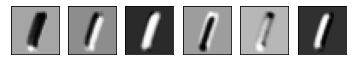

2 번째 Convolutional 레이어 (14, 14, 6)


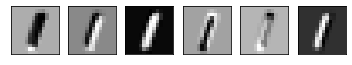

3 번째 Convolutional 레이어 (10, 10, 16)


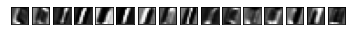

4 번째 Convolutional 레이어 (5, 5, 16)


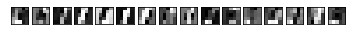

5 번째 Dense 레이어 (400,)


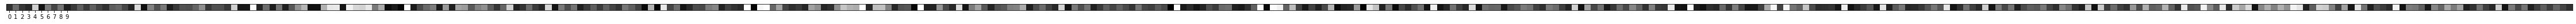

6 번째 Dense 레이어 (120,)


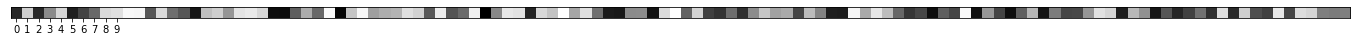

7 번째 Dense 레이어 (84,)


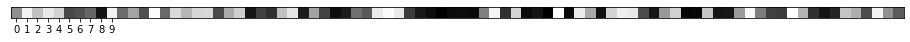

In [34]:
sample_idx = 5
show_featuremap(sample_idx, x_pred_maps, cnn_layers, dnn_layers)

## 과제 1. 의류 이미지 분류
---
* 데이터셋 : f-minst(fashoin mnist)
* 데이터를 소개하세요.
* 데이터의 형태를 파악하세요
* 적절한 모델을 생성하세요
* 데이터에 적합하게 학습을 진행하세요.

In [67]:
# fashoin mnist는 운동화, 셔츠, 샌들과 같은 이미지들의 모임
f_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = f_mnist.load_data()
# 전처리-정규화
x_train, x_test = x_train/255.0 , x_test/255.0
# 전처리-shape 맞추기
x_train = np.expand_dims(x_train, 3)
x_test = np.expand_dims(x_test, 3)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1) (60000,) (10000,)


In [68]:
from tensorflow.keras import layers, models, utils
def build_lenet5_2():
  x = layers.Input(shape = (28,28,1))
  y = layers.Conv2D(filters=6, kernel_size = 5, padding = 'same', activation = 'tanh')(x)
  y = layers.AvgPool2D(pool_size = 2, strides = 2)(y)
  y = layers.Conv2D(filters=16, kernel_size = 5, padding = 'valid', activation = 'tanh')(y)
  y = layers.MaxPool2D(pool_size = 2, strides = 2)(y)

  y = layers.Flatten()(y)
  y = layers.Dense(120, activation='tanh')(y)
  y = layers.Dense(84, activation='tanh')(y)
  y = layers.Dense(10, activation='softmax')(y)
  model = tf.keras.models.Model(x,y)
  return model

In [69]:
model = build_lenet5_2()
model.summary()
model.compile(optimizer = 'sgd', # 경사하강법 (배치)
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']
              )
model.fit(x_train, y_train, epochs=10)
print('===테스트 스코어===')
model.evaluate(x_test, y_test)

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_16 (Avera  (None, 14, 14, 6)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_25 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 400)               0  

[0.3418472111225128, 0.8744999766349792]

In [70]:
#for layer in model.layers:
#  print(layer, layer.output)
layer_outputs = [layer.output for layer in model.layers] # 레이어의 아웃풋 = 데이터 변환과정
model_output_by_layer = models.Model(inputs=model.input, outputs=layer_outputs) # 모든 레이어의 아웃풋 획득 가능
print(len(layer_outputs))
x_pred_maps = model_output_by_layer(x_test)
for x_pred_map in x_pred_maps:
  print(x_pred_map.shape)
cnn_layers = [1,2,3,4]
dnn_layers = [5,6,7]

9
(10000, 28, 28, 1)
(10000, 28, 28, 6)
(10000, 14, 14, 6)
(10000, 10, 10, 16)
(10000, 5, 5, 16)
(10000, 400)
(10000, 120)
(10000, 84)
(10000, 10)


1 번째 Convolutional 레이어 (28, 28, 6)


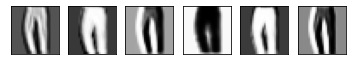

2 번째 Convolutional 레이어 (14, 14, 6)


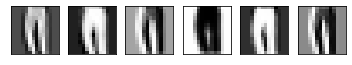

3 번째 Convolutional 레이어 (10, 10, 16)


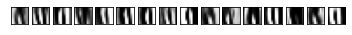

4 번째 Convolutional 레이어 (5, 5, 16)


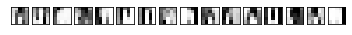

5 번째 Dense 레이어 (400,)


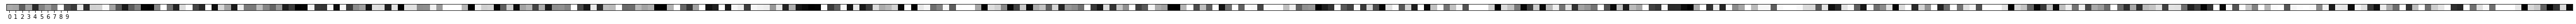

6 번째 Dense 레이어 (120,)


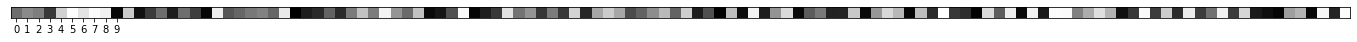

7 번째 Dense 레이어 (84,)


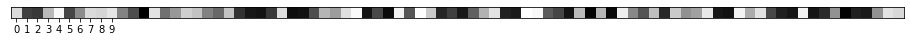

In [71]:
sample_idx = 5
show_featuremap(sample_idx, x_pred_maps, cnn_layers, dnn_layers)

## 과제 2. 동물 및 물체 이미지 분류
---
* 데이터셋 : cifar-10
* 데이터의 형태를 파악하세요
* 적절한 모델을 생성하세요
* 데이터를 학습하세요.

In [45]:
# cifar10은 10종류의 이미지들의 모임
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# 전처리-정규화
x_train, x_test = x_train/255.0 , x_test/255.0
# 전처리-shape 맞추기
# x_train = np.expand_dims(x_train, 3)
# x_test = np.expand_dims(x_test, 3)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3) (50000, 1) (10000, 1)


In [61]:
from tensorflow.keras import layers, models, utils
def build_lenet5_3():
  x = layers.Input(shape = (32,32,3))
  y = layers.Conv2D(filters=6, kernel_size = 5, padding = 'same', activation = 'tanh')(x)
  y = layers.AvgPool2D(pool_size = 2, strides = 2)(y)
  y = layers.Conv2D(filters=16, kernel_size = 5, padding = 'valid', activation = 'tanh')(y)
  y = layers.MaxPool2D(pool_size = 2, strides = 2)(y)

  y = layers.Flatten()(y)
  y = layers.Dense(120, activation='tanh')(y)
  y = layers.Dense(84, activation='tanh')(y)
  y = layers.Dense(10, activation='softmax')(y)
  model = tf.keras.models.Model(x,y)
  return model

In [62]:
model = build_lenet5_3()
model.summary()
model.compile(optimizer = 'sgd', # 경사하강법 (배치)
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']
              )
model.fit(x_train, y_train, epochs=10)
print('===테스트 스코어===')
model.evaluate(x_test, y_test)

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_22 (Conv2D)          (None, 32, 32, 6)         456       
                                                                 
 average_pooling2d_15 (Avera  (None, 16, 16, 6)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_23 (Conv2D)          (None, 12, 12, 16)        2416      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 flatten_8 (Flatten)         (None, 576)               0  

[1.1500056982040405, 0.6000999808311462]

In [64]:
#for layer in model.layers:
#  print(layer, layer.output)
layer_outputs = [layer.output for layer in model.layers] # 레이어의 아웃풋 = 데이터 변환과정
model_output_by_layer = models.Model(inputs=model.input, outputs=layer_outputs) # 모든 레이어의 아웃풋 획득 가능
print(len(layer_outputs))
x_pred_maps = model_output_by_layer(x_test)
for x_pred_map in x_pred_maps:
  print(x_pred_map.shape)
cnn_layers = [1,2,3,4]
dnn_layers = [5,6,7]

9
(10000, 32, 32, 3)
(10000, 32, 32, 6)
(10000, 16, 16, 6)
(10000, 12, 12, 16)
(10000, 6, 6, 16)
(10000, 576)
(10000, 120)
(10000, 84)
(10000, 10)


1 번째 Convolutional 레이어 (32, 32, 6)


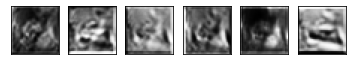

2 번째 Convolutional 레이어 (16, 16, 6)


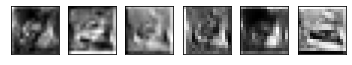

3 번째 Convolutional 레이어 (12, 12, 16)


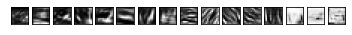

4 번째 Convolutional 레이어 (6, 6, 16)


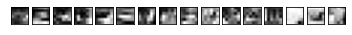

5 번째 Dense 레이어 (576,)


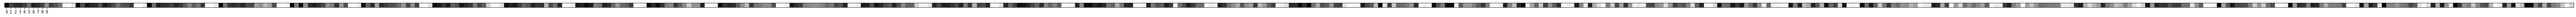

6 번째 Dense 레이어 (120,)


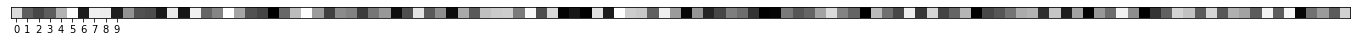

7 번째 Dense 레이어 (84,)


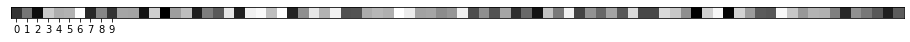

In [65]:
sample_idx = 5
show_featuremap(sample_idx, x_pred_maps, cnn_layers, dnn_layers)